In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib._color_data as mcd
from matplotlib.gridspec import GridSpec

In [ ]:
fname = "Results_Binary_Erik_V8_20250116.xlsx"
df = pd.read_excel(fname, na_values=['nan'])
df

,Type,Number,Title,Word count,Problem: Human-centered,Problem: Biological,Problem: Non-biological,Problem: Treatment,Opportunities caused by ocean plastic,Opportunities caused by treatment,...,Research Area: Lab-setting,Research Area,Sample Type,Computer Model,Sample: Human,Sample: Inorganic material,Sample: Cold-blooded Vertebrates,Sample: Invertebrates,Sample: (Bio)plastic,Sample: Other
0,Color,NaN,NaN,NaN,#1F4E78,#2F75B5,#8EA9DB,#D9E1F2,#806000,#FFC000,...,#00B0F0,#00B0F0,#ED7D31,#C6E0B4,#833C0C,#C65911,#FFD966,#F4B084,#FCE4D6,#FF3300
1,PR,1.00,A 'marine motorhome for microbes',568.0,0,1,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
2,NaN,1.25,1.25,203.0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
3,NaN,1.10,1.1,127.0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
4,NaN,1.11,1.11,455.0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,86.27,86.27,385.0,0,1,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
137,NaN,86.13,86.13,55.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
138,NaN,86.60,86.6,180.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
139,NaN,86.50,86.5,577.0,0,1,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0


/var/folders/x0/1qxj679n55zcybylvdsb4bxh0000gq/T/ipykernel_28837/1297836564.py:181: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


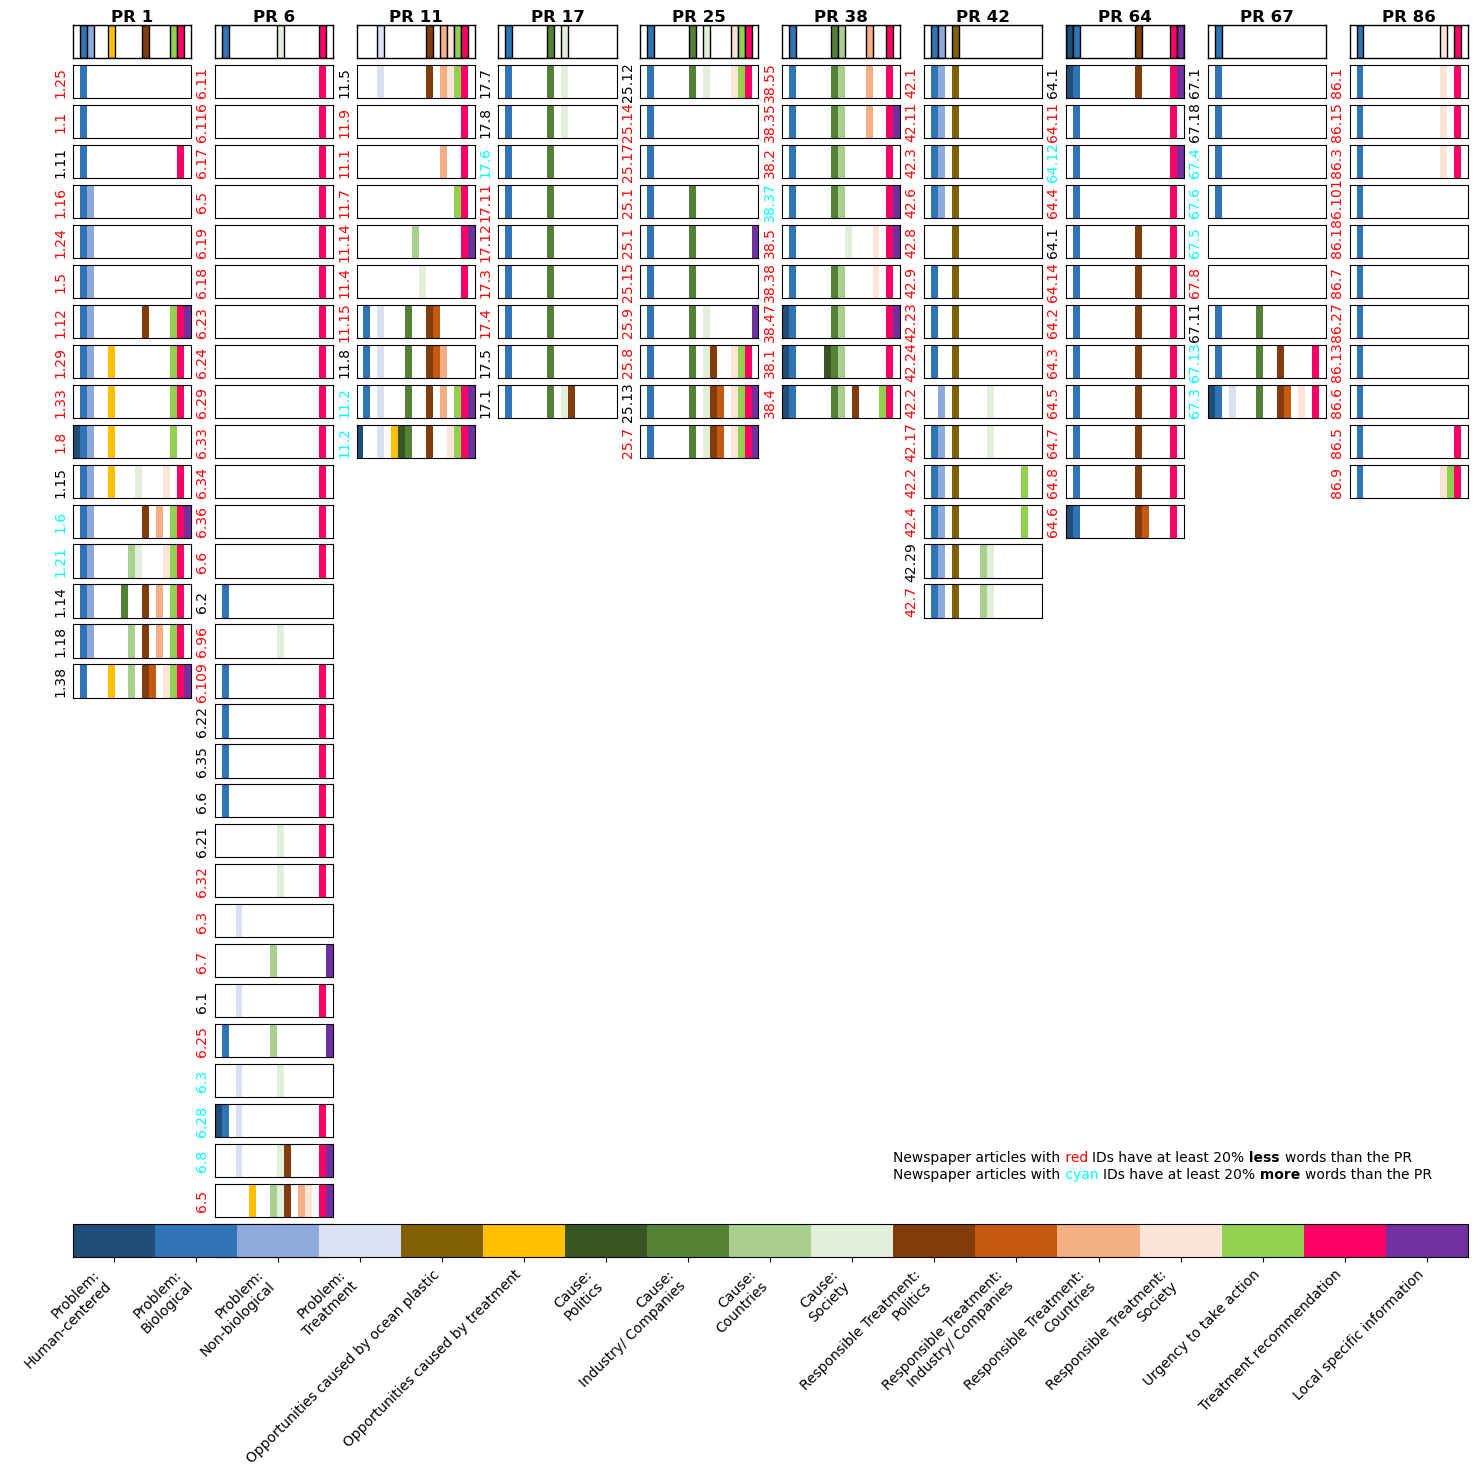

/var/folders/x0/1qxj679n55zcybylvdsb4bxh0000gq/T/ipykernel_28837/1297836564.py:181: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


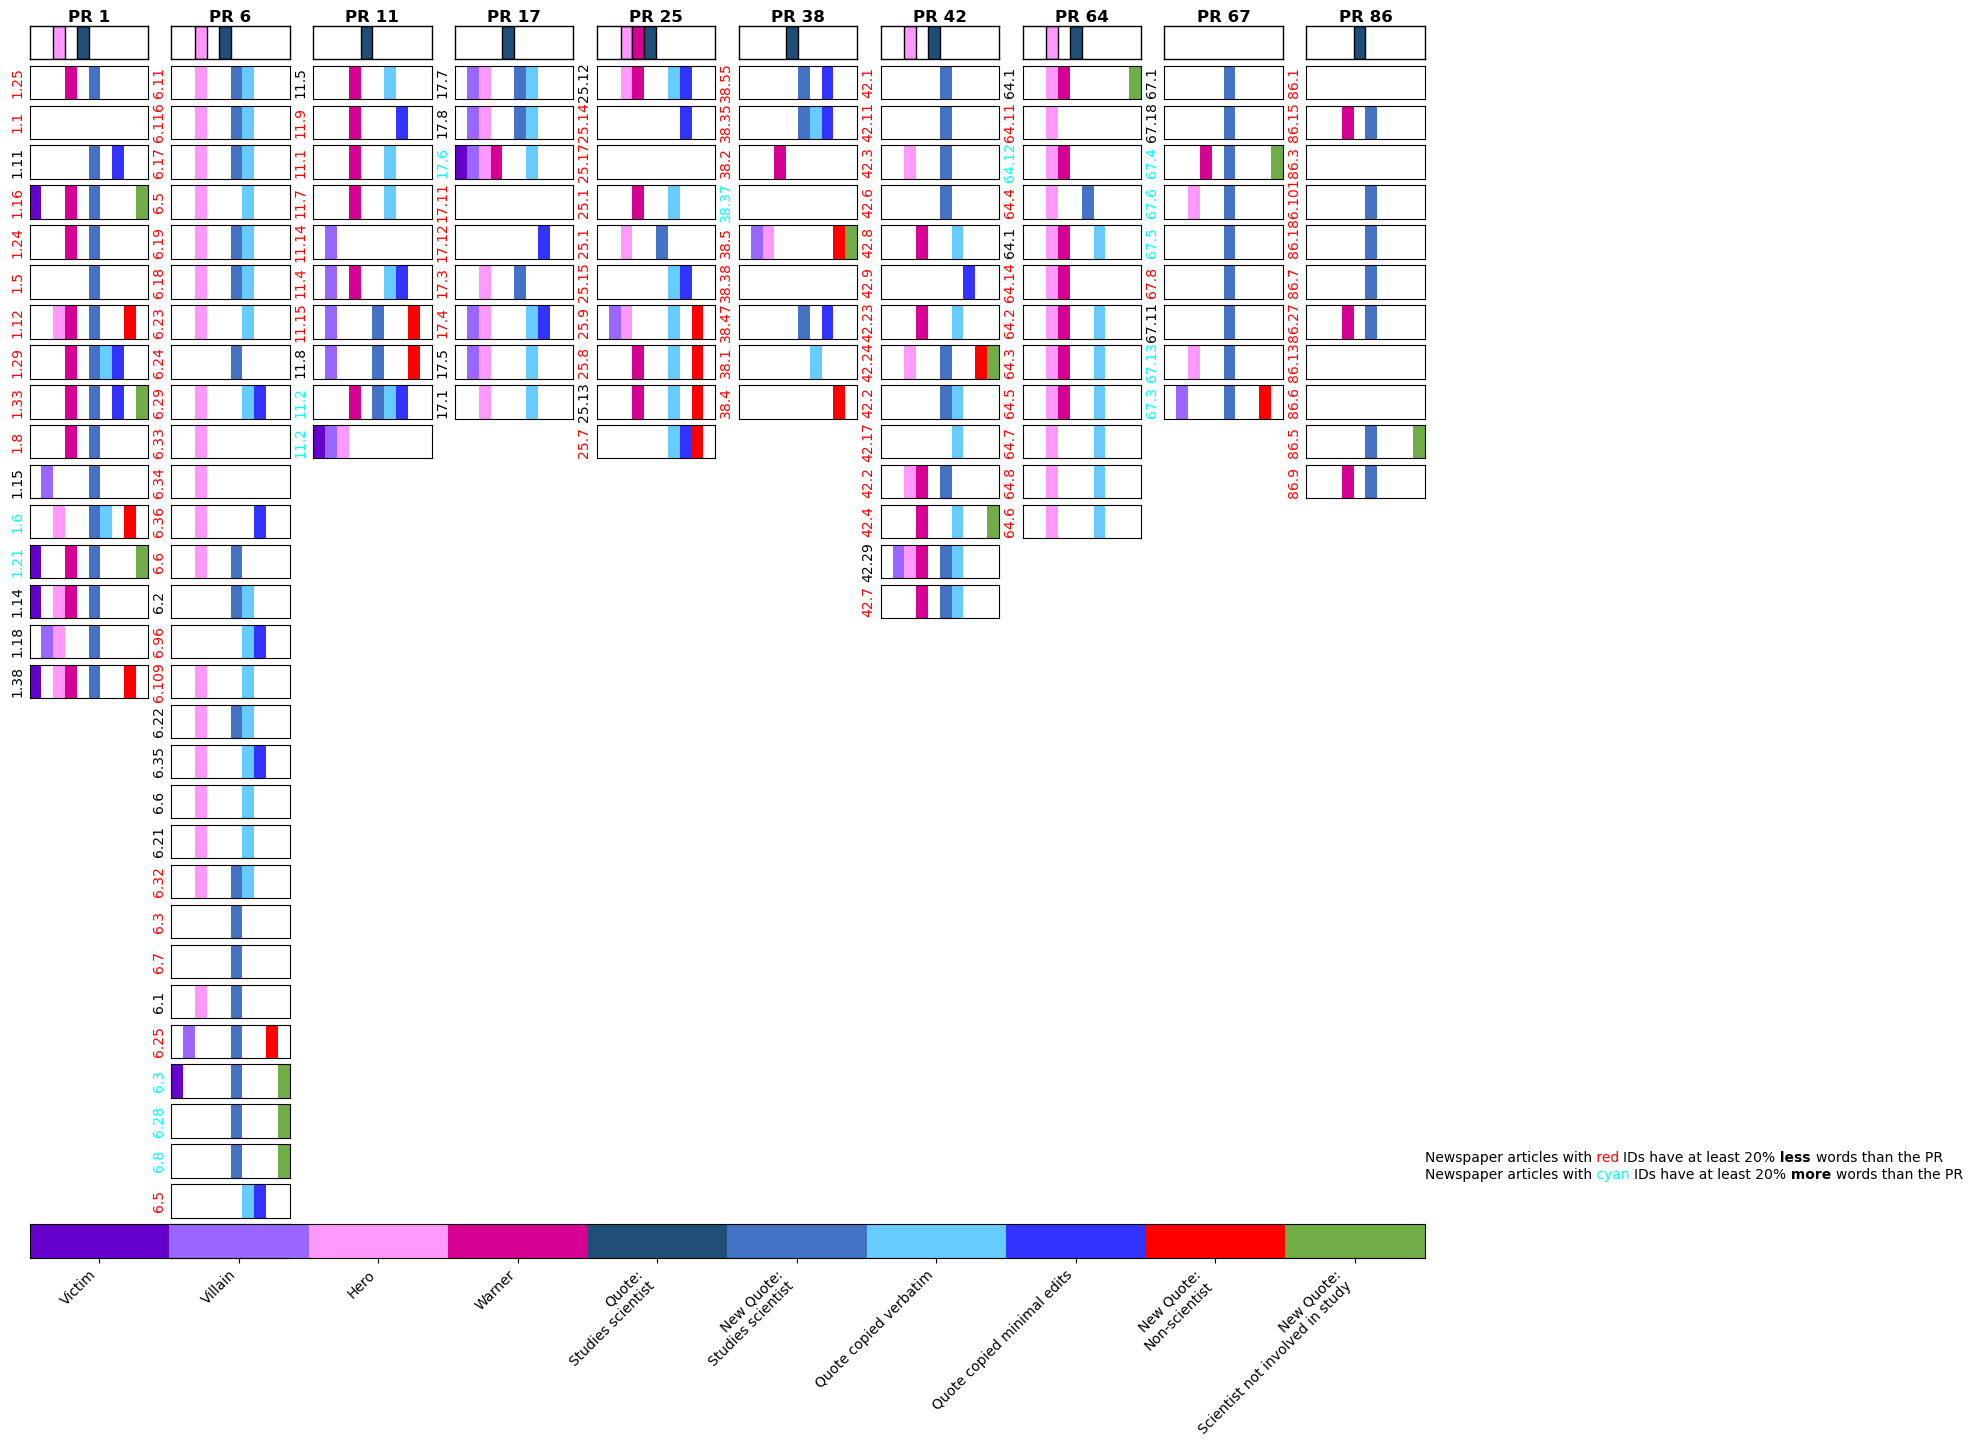

/var/folders/x0/1qxj679n55zcybylvdsb4bxh0000gq/T/ipykernel_28837/1297836564.py:181: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


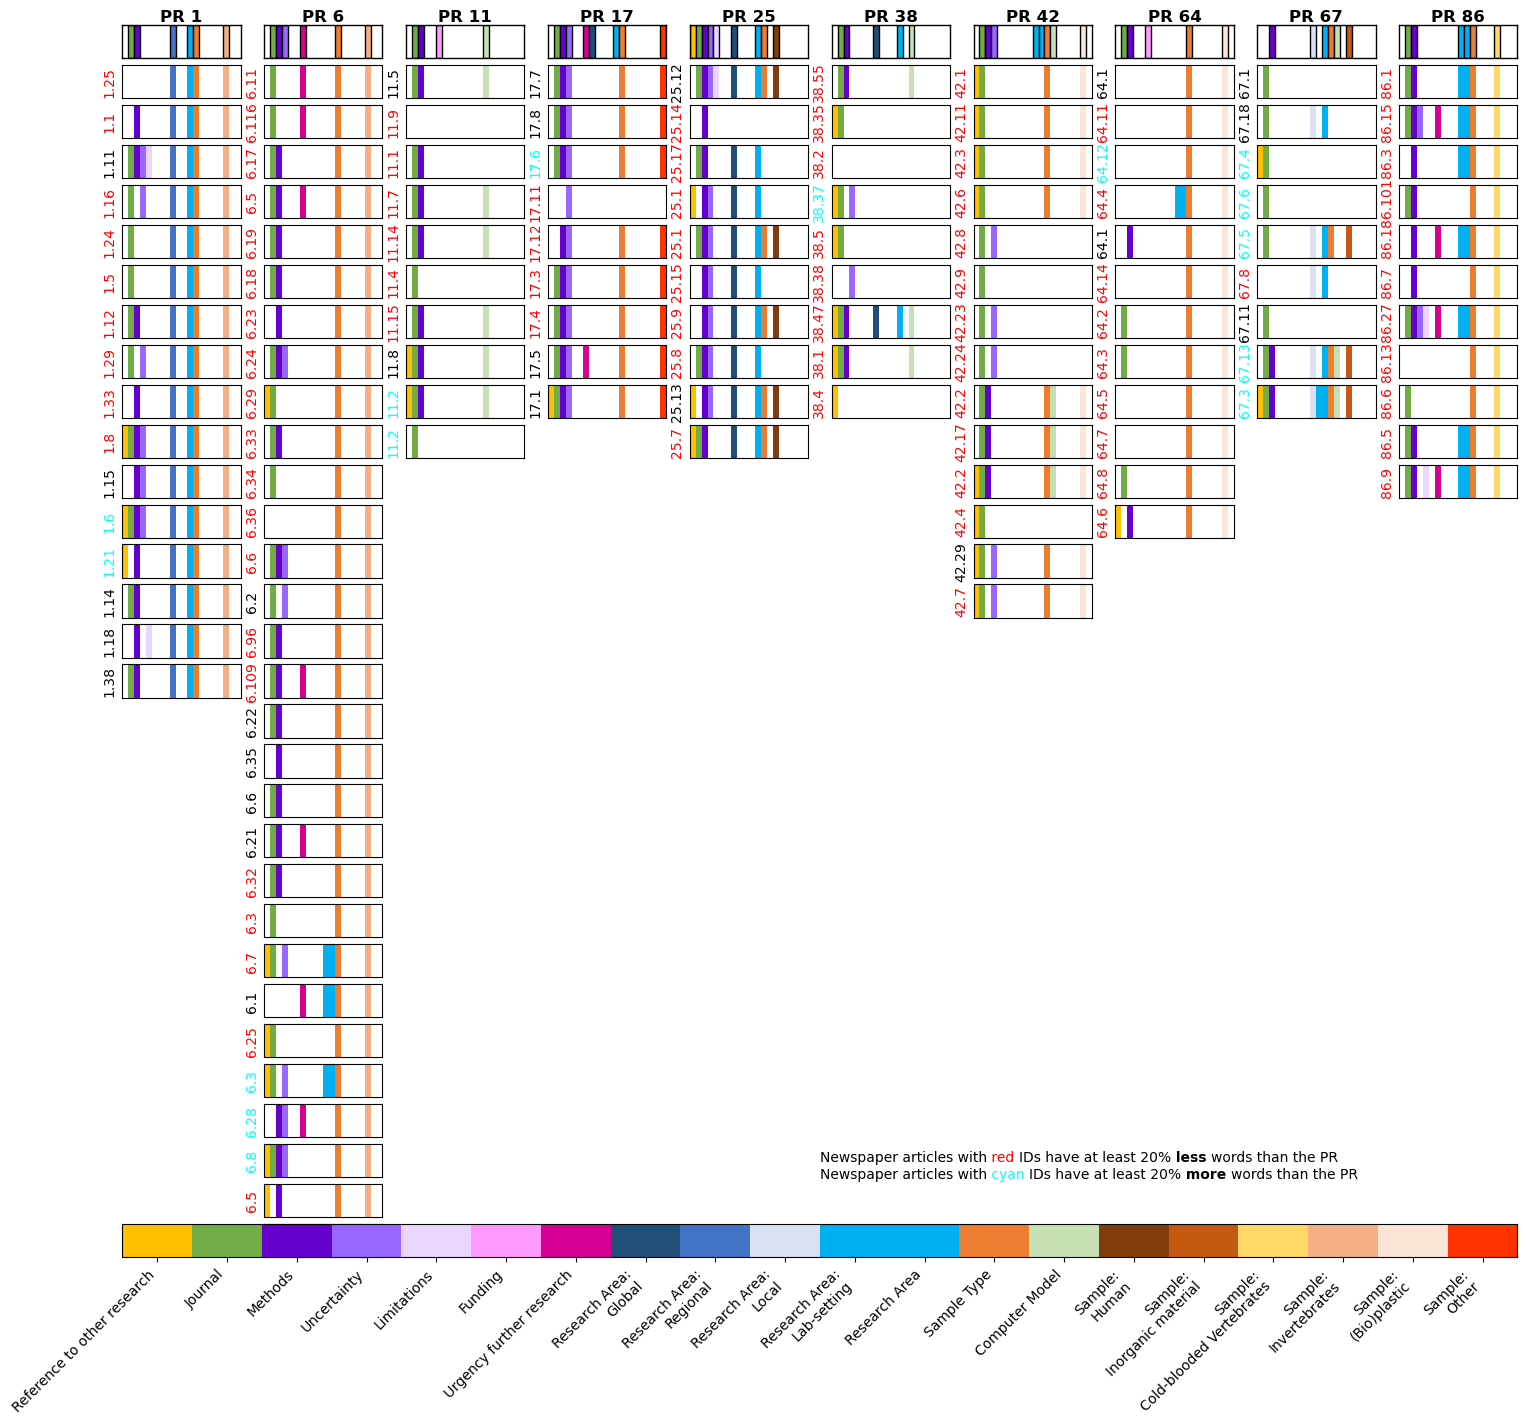

/var/folders/x0/1qxj679n55zcybylvdsb4bxh0000gq/T/ipykernel_28837/1297836564.py:181: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


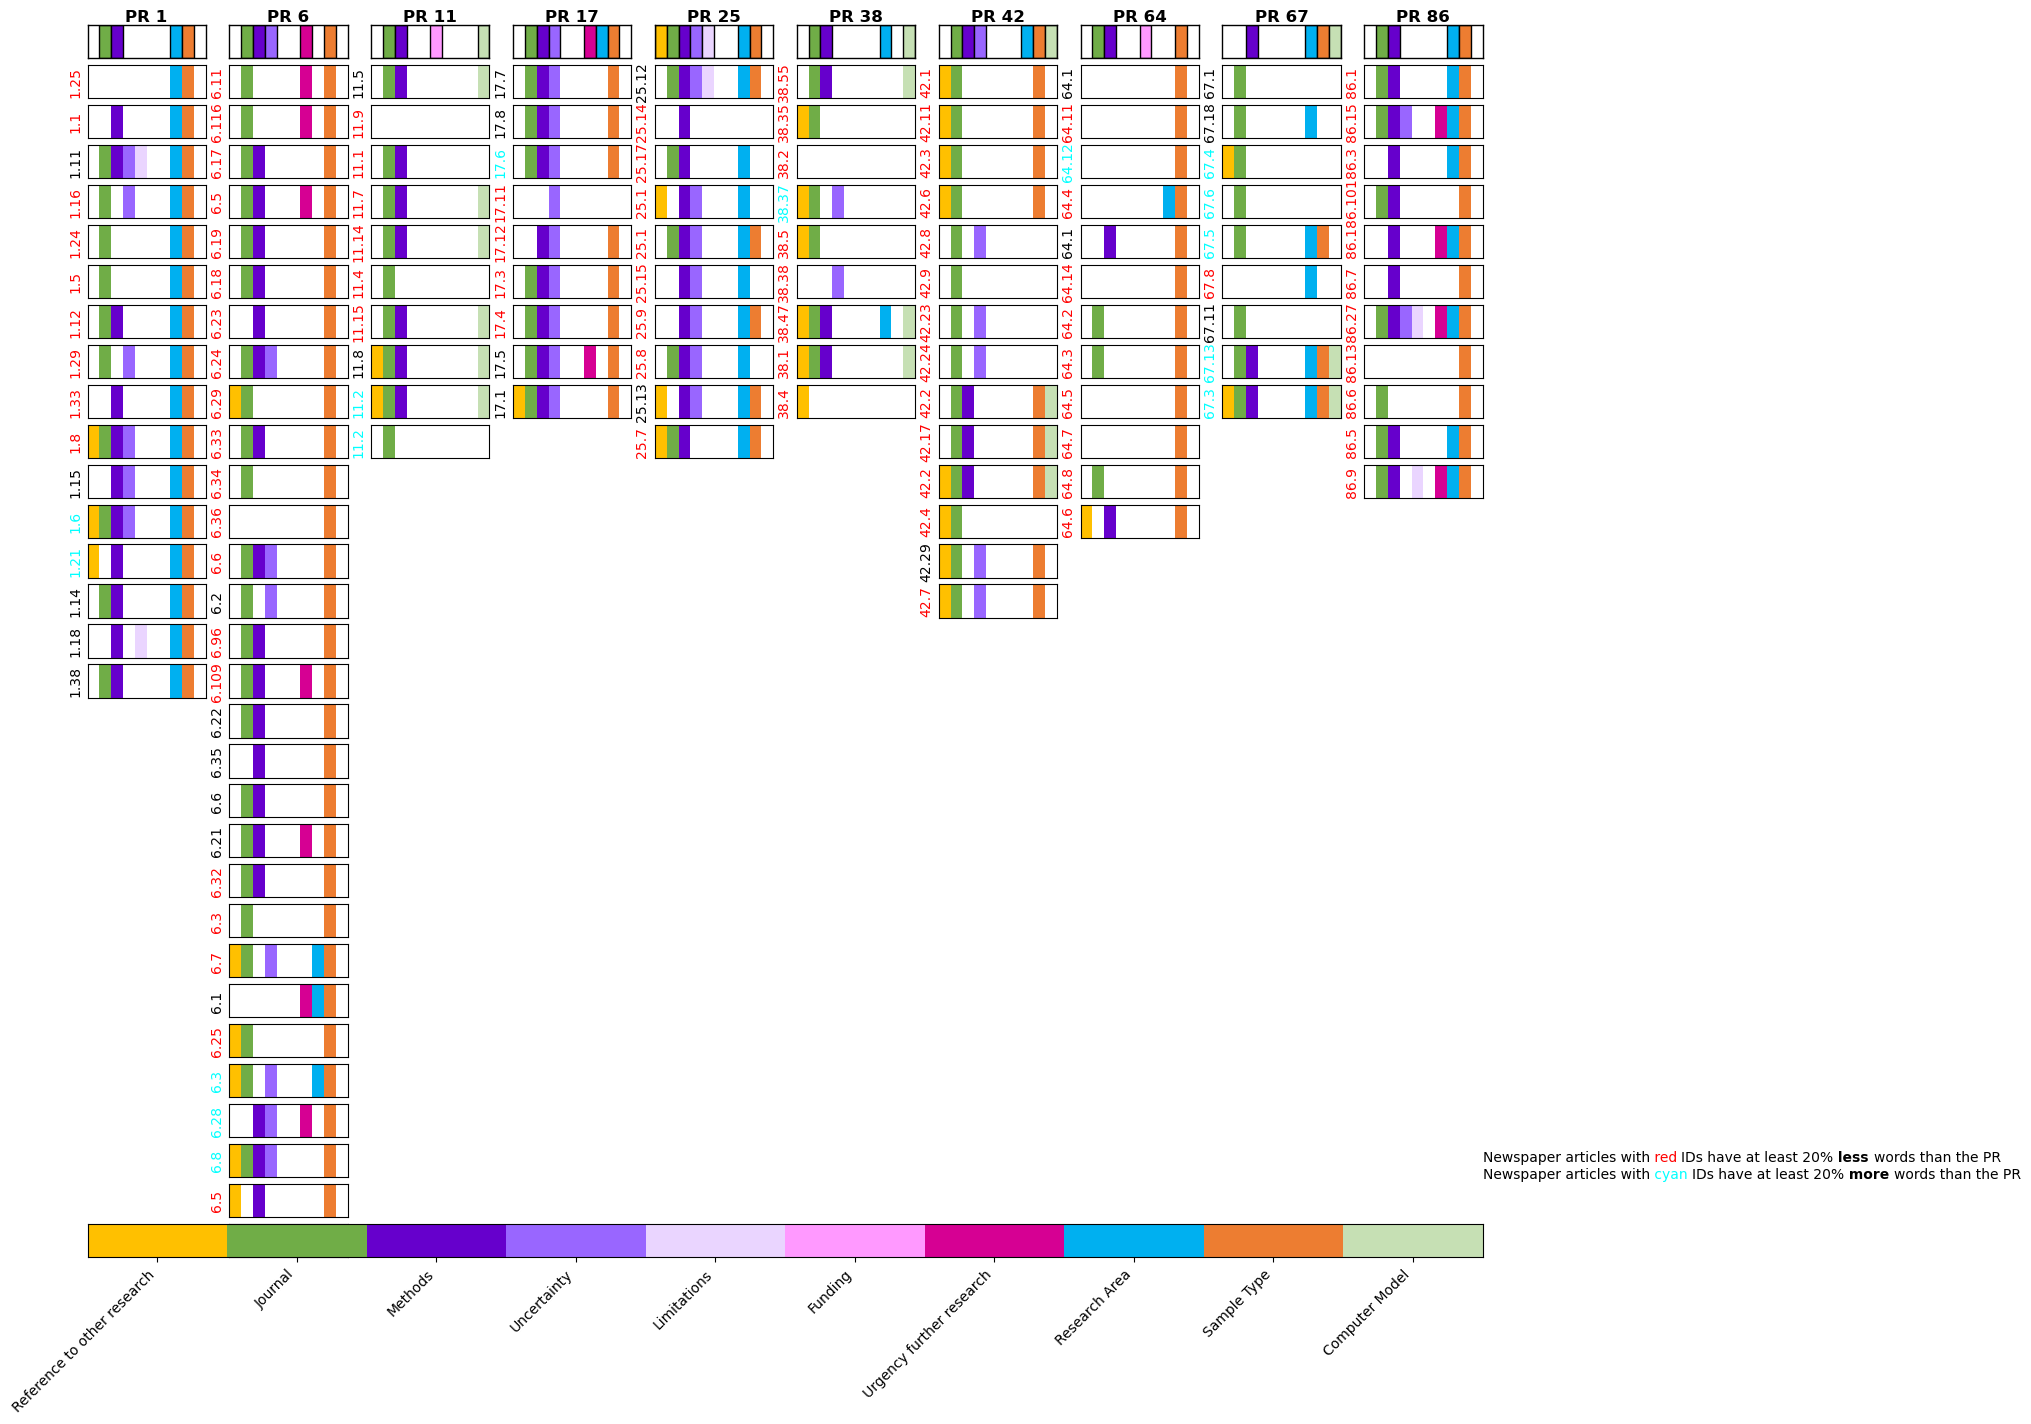

In [3]:
colors = df.iloc[0]
figcols = [['Problem: Human-centered',
            'Problem: Biological',
            'Problem: Non-biological',
            'Problem: Treatment',
            'Opportunities caused by ocean plastic',
            'Opportunities caused by treatment',
            'Cause: Politics',
            'Cause: Industry/ Companies',
            'Cause: Countries',
            'Cause: Society',
            'Responsible Treatment: Politics',
            'Responsible Treatment: Industry/ Companies',
            'Responsible Treatment: Countries',
            'Responsible Treatment: Society',
            'Urgency to take action',
            'Treatment recommendation',
            'Local specific information',
            # 'Topic refers to Climate Change'
            ],
            [#'Inverted Pyramid Style',
            #  'Personalization',
            #  'Stylistic element',
            #  'Negative emotion',
            #  'Positive emotion',
            #  'Other emotion',
            #  'Negative tone',
            #  'Neutral tone',
            #  'Positive tone',
             'Victim',
             'Villain',
             'Hero',
             'Warner',
             'Quote: Studies scientist',
             'New Quote: Studies scientist',
            #  'Quote same as PR',
             'Quote copied verbatim',
             'Quote copied minimal edits',
             'New Quote: Non-scientist',
             'New Quote: Scientist not involved in study'],
             ['Reference to other research',
              'Journal',
              'Methods',
              'Uncertainty',
              'Limitations',
              'Funding',
              'Urgency further research',
              'Research Area: Global',
              'Research Area: Regional',
              'Research Area: Local',
              'Research Area: Lab-setting',
              'Research Area',
              'Sample Type',
              'Computer Model',
              'Sample: Human',
              'Sample: Inorganic material',
              'Sample: Cold-blooded Vertebrates',
              'Sample: Invertebrates',
              'Sample: (Bio)plastic',
              'Sample: Other'],
              ['Reference to other research',
              'Journal',
              'Methods',
              'Uncertainty',
              'Limitations',
              'Funding',
              'Urgency further research',
              'Research Area',
              'Sample Type',
              'Computer Model']
            ]

change_factor_len = 20
change_factor_color_high = "cyan"
change_factor_color_low = "red"
legend = "horizontal"

for fignum in range(len(figcols)):
    num_vars = len(figcols[fignum])
    fig = plt.figure(figsize=(18, 16))
    if legend == "horizontal":
        gs = GridSpec(31, 10, figure=fig)
    elif legend == "vertical":
        widths = [1] * 10 + [0.3]
        heights = [1.5] + [1] * 30
        gs = GridSpec(31, 11, figure=fig, width_ratios=widths, height_ratios=heights)
    pr_num = -1
    for index, row in df.iterrows():
        if isinstance(row["Type"], str) and "PR" in row["Type"]:  # Info about the PR itself
            PR = row
            pr_num += 1
            ai = fig.add_subplot(gs[0, pr_num])
            ai.set_xlim(0, num_vars)
            ai.set_ylim(0, 1)
            ai.set_xticks([])
            ai.set_yticks([])

            frame_num = 0
            for name, values in row.items():
                if name in figcols[fignum]:
                    if values == 1:
                        rect = patches.Rectangle((frame_num, 0), 1, 1, edgecolor='black', facecolor=colors[name])
                        ai.add_patch(rect)
                    frame_num += 1
            ai.set_title(f"PR {int(row['Number'])}", fontweight="bold", rotation=0, va="center")
            pr_len = row["Word count "]
            # ai.set_ylabel(f"PR {int(row['Number'])}", fontweight="bold")
            for axis in ['top','bottom','left','right']:
                ai.spines[axis].set_linewidth(1)
            # ax[0, pr_num].set_title(f"PR {row['Unnamed: 0'][:2]}", y=1.1)

            article_num = 1  # reset article number counter

        elif row["Type"] not in ["Color"]:  # Info about the article
            ai = fig.add_subplot(gs[article_num, pr_num])
            ai.set_xlim(0, num_vars)
            ai.set_ylim(0, 1)
            ai.set_xticks([])
            ai.set_yticks([])

            frame_num = 0
            for name, values in row.items():
                if name in figcols[fignum]:
                    if values:
                        rect = patches.Rectangle((frame_num, 0), 1, 1, edgecolor='none', facecolor=colors[name])
                        ai.add_patch(rect)
                    frame_num += 1
            na_len = row["Word count "]
            if na_len/pr_len < 1-change_factor_len/100:
                fc = change_factor_color_low
            elif na_len/pr_len > 1+change_factor_len/100:
                fc = change_factor_color_high
            else:
                fc = "black"
            ai.set_ylabel(row["Number"], color=fc)
            article_num += 1

    if legend == "horizontal":
        ax = fig.add_subplot(gs[-1, :])
        ax.set_xlim(0, num_vars)
        ax.set_ylim(0, 1)
        ax.set_xticks(np.arange(0.5, num_vars, 1))
        ax.set_yticks([])
        frame_num = 0
        for name, values in row.items():
            if name in figcols[fignum]:
                rect = patches.Rectangle((frame_num, 0), 1, 1, edgecolor='none', facecolor=colors[name])
                ax.add_patch(rect)
                frame_num += 1
        ax.set_xticklabels([t.replace(': ', ':\n') for t in figcols[fignum]], rotation=45, ha="right")
        text_x = 10
        text_y = [3, 2.5]

    elif legend == "vertical":
        ax = fig.add_subplot(gs[:, -1])
        ax.set_ylim(0, num_vars)
        ax.set_xlim(0, 1)
        ax.set_yticks(np.arange(0.5, num_vars, 1))
        ax.yaxis.tick_right()
        ax.set_xticks([])
        frame_num = 0
        for name, values in row.items():
            if name in figcols[fignum]:
                rect = patches.Rectangle((0, frame_num), 1, 1, edgecolor='none', facecolor=colors[name])
                ax.add_patch(rect)
                frame_num += 1
        ax.set_yticklabels([t.replace(': ', ':\n') for t in figcols[fignum]])
        text_x = -20
        text_y = [3, 2.5]

    text = plt.text(text_x, text_y[0], "Newspaper articles with", va='center')
    text = ax.annotate(f" {change_factor_color_low} ", xycoords=text, xy=(1, .5), color=change_factor_color_low, va='center')
    text = ax.annotate(f"IDs have at least {change_factor_len}%", xycoords=text, xy=(1, .5), va='center')
    text = ax.annotate(" less ", xycoords=text, xy=(1, .5), va='center', fontweight="bold")
    text = ax.annotate("words than the PR", xycoords=text, xy=(1, .5), va='center')
    text = plt.text(text_x, text_y[1], "Newspaper articles with", va='center')
    text = ax.annotate(f" {change_factor_color_high} ", xycoords=text, xy=(1, .5), color=change_factor_color_high, va='center')
    text = ax.annotate(f"IDs have at least {change_factor_len}%", xycoords=text, xy=(1, .5), va='center')
    text = ax.annotate(" more ", xycoords=text, xy=(1, .5), va='center', fontweight="bold")
    text = ax.annotate("words than the PR", xycoords=text, xy=(1, .5), va='center')
    plt.tight_layout()
    plt.show()
